In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

os.chdir(r"D:\CK0731\v3")
import UnetModel
import UnetDataset

In [7]:
# Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

weight_path = r"D:\CK0731\v3\UnetModel_0040.pth"
model = UnetModel.UNetIso().to(device)
model.load_state_dict(torch.load(weight_path))
model.eval()


UNetIso(
  (enc1): Sequential(
    (0): Conv2d(2, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc5): Sequential(
    (0): Conv2d(512, 1024, kern

[[-149.41266 -159.75368 -164.67953 ... -103.17375 -102.04084 -103.58866]
 [-159.83107 -154.79051 -160.66664 ... -101.96877 -103.47779 -102.83972]
 [-160.4023  -160.01942 -155.80122 ... -101.95696 -103.32847 -102.10159]
 ...
 [-159.93666 -157.57545 -162.52888 ... -159.22188 -158.33606 -160.6852 ]
 [-159.70668 -159.85577 -157.72485 ... -158.84596 -159.10352 -159.33022]
 [-159.95332 -160.0994  -160.02794 ... -160.2274  -159.99641 -159.77669]]


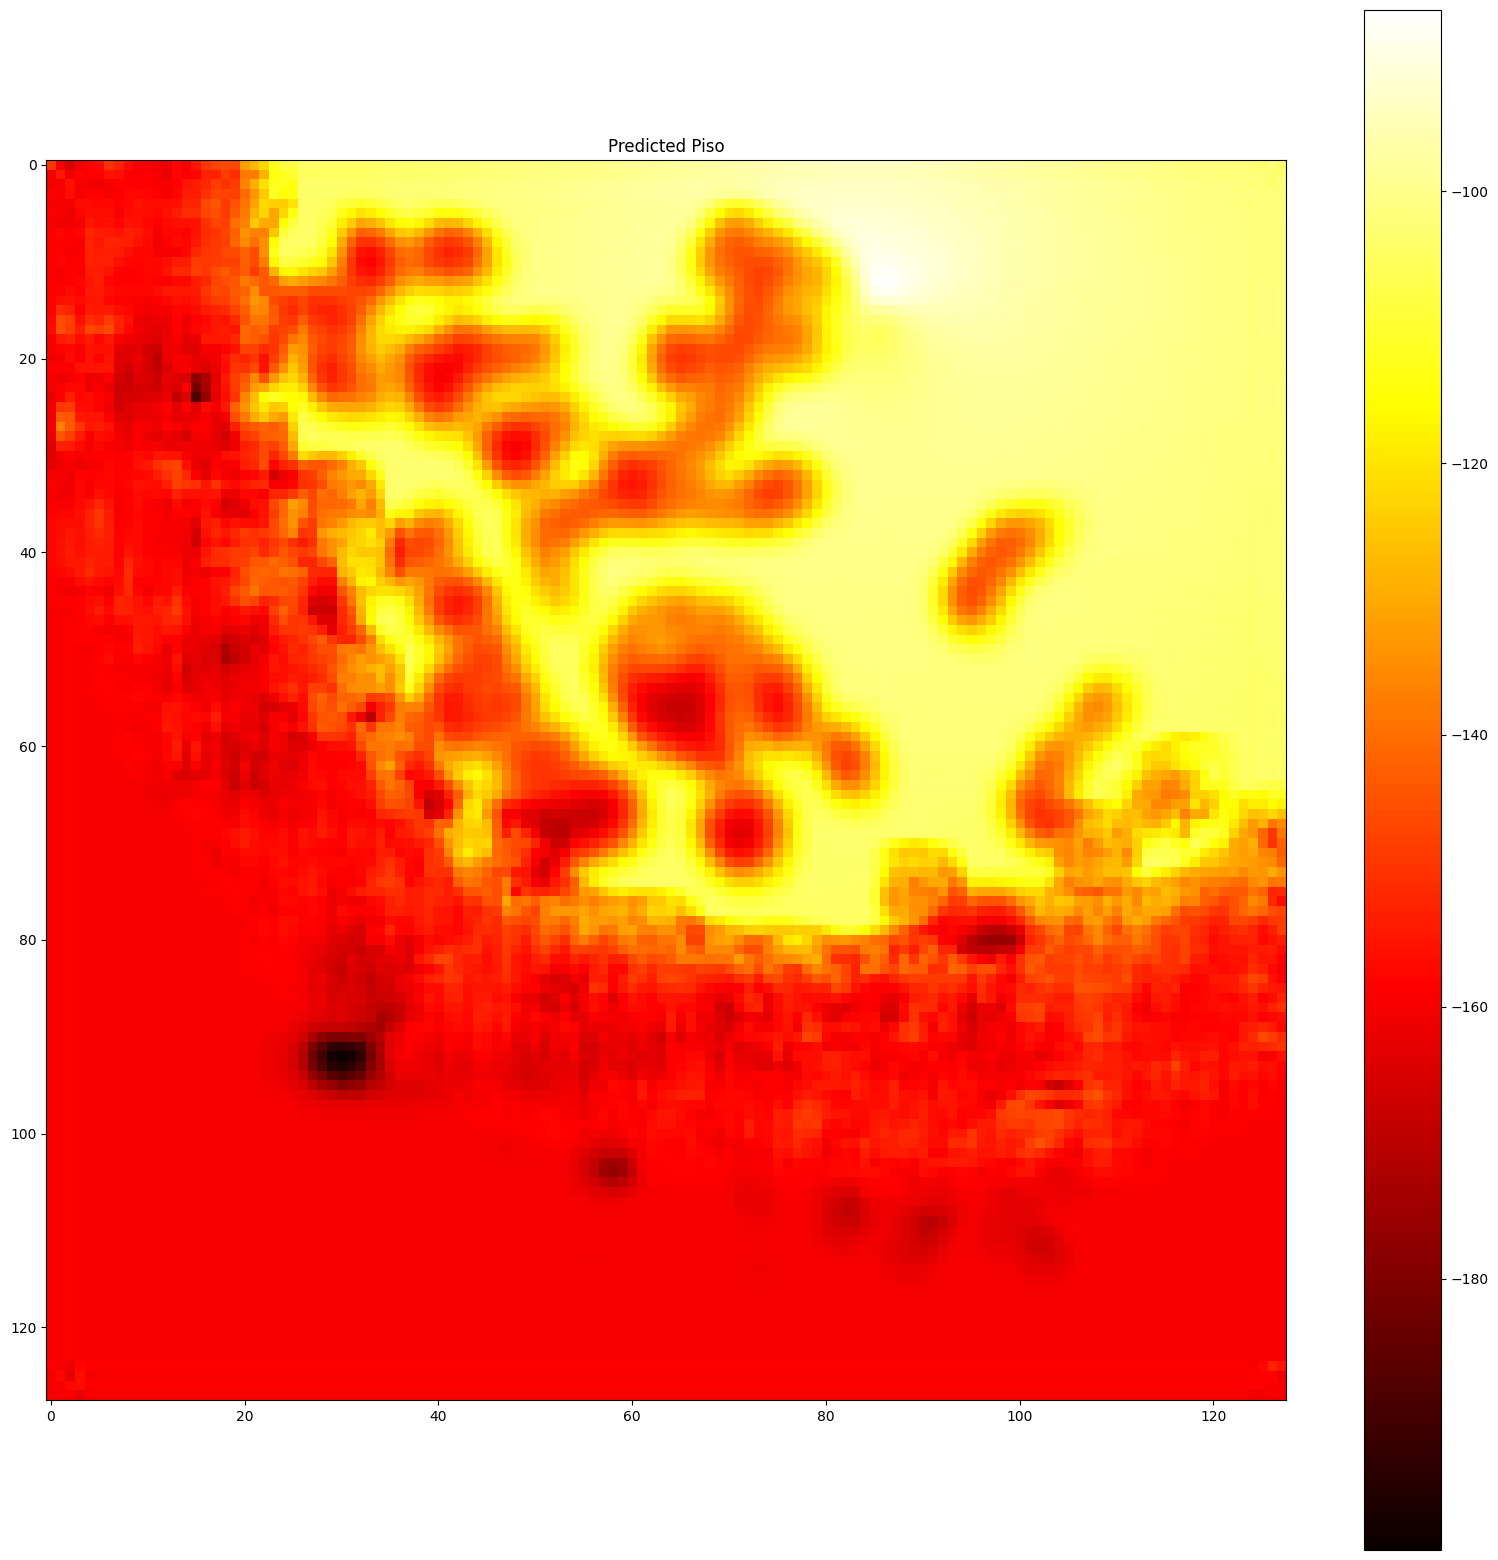

In [8]:
from matplotlib import pyplot as plt
x1 = np.load(r"D:\CK0731\ATN_v3_val\ATN1_6.npy")
x2 = np.load(r"D:\CK0731\BDM_v3_val\BDM1_6.npy")
input_image = np.stack([x1, x2], axis=-1)
input_image = torch.from_numpy(input_image).permute(2, 0, 1).unsqueeze(0).to(device)
with torch.no_grad():
    output_image = model(input_image)
output_image = output_image.squeeze().cpu().numpy()

plt.figure(figsize=(20,20))
plt.subplot()
plt.imshow(output_image, cmap='hot')
plt.title('Predicted Piso')
plt.colorbar()
print(output_image)


[[-160.       -160.       -160.       ...  -99.46229   -99.92577
  -100.15918 ]
 [-160.       -160.       -160.       ... -100.00712  -100.556305
  -101.41333 ]
 [-160.       -160.       -160.       ... -100.52408  -101.07149
   -99.80121 ]
 ...
 [-160.       -160.       -160.       ... -160.       -160.
  -160.      ]
 [-160.       -160.       -160.       ... -160.       -160.
  -160.      ]
 [-160.       -160.       -160.       ... -160.       -160.
  -160.      ]]


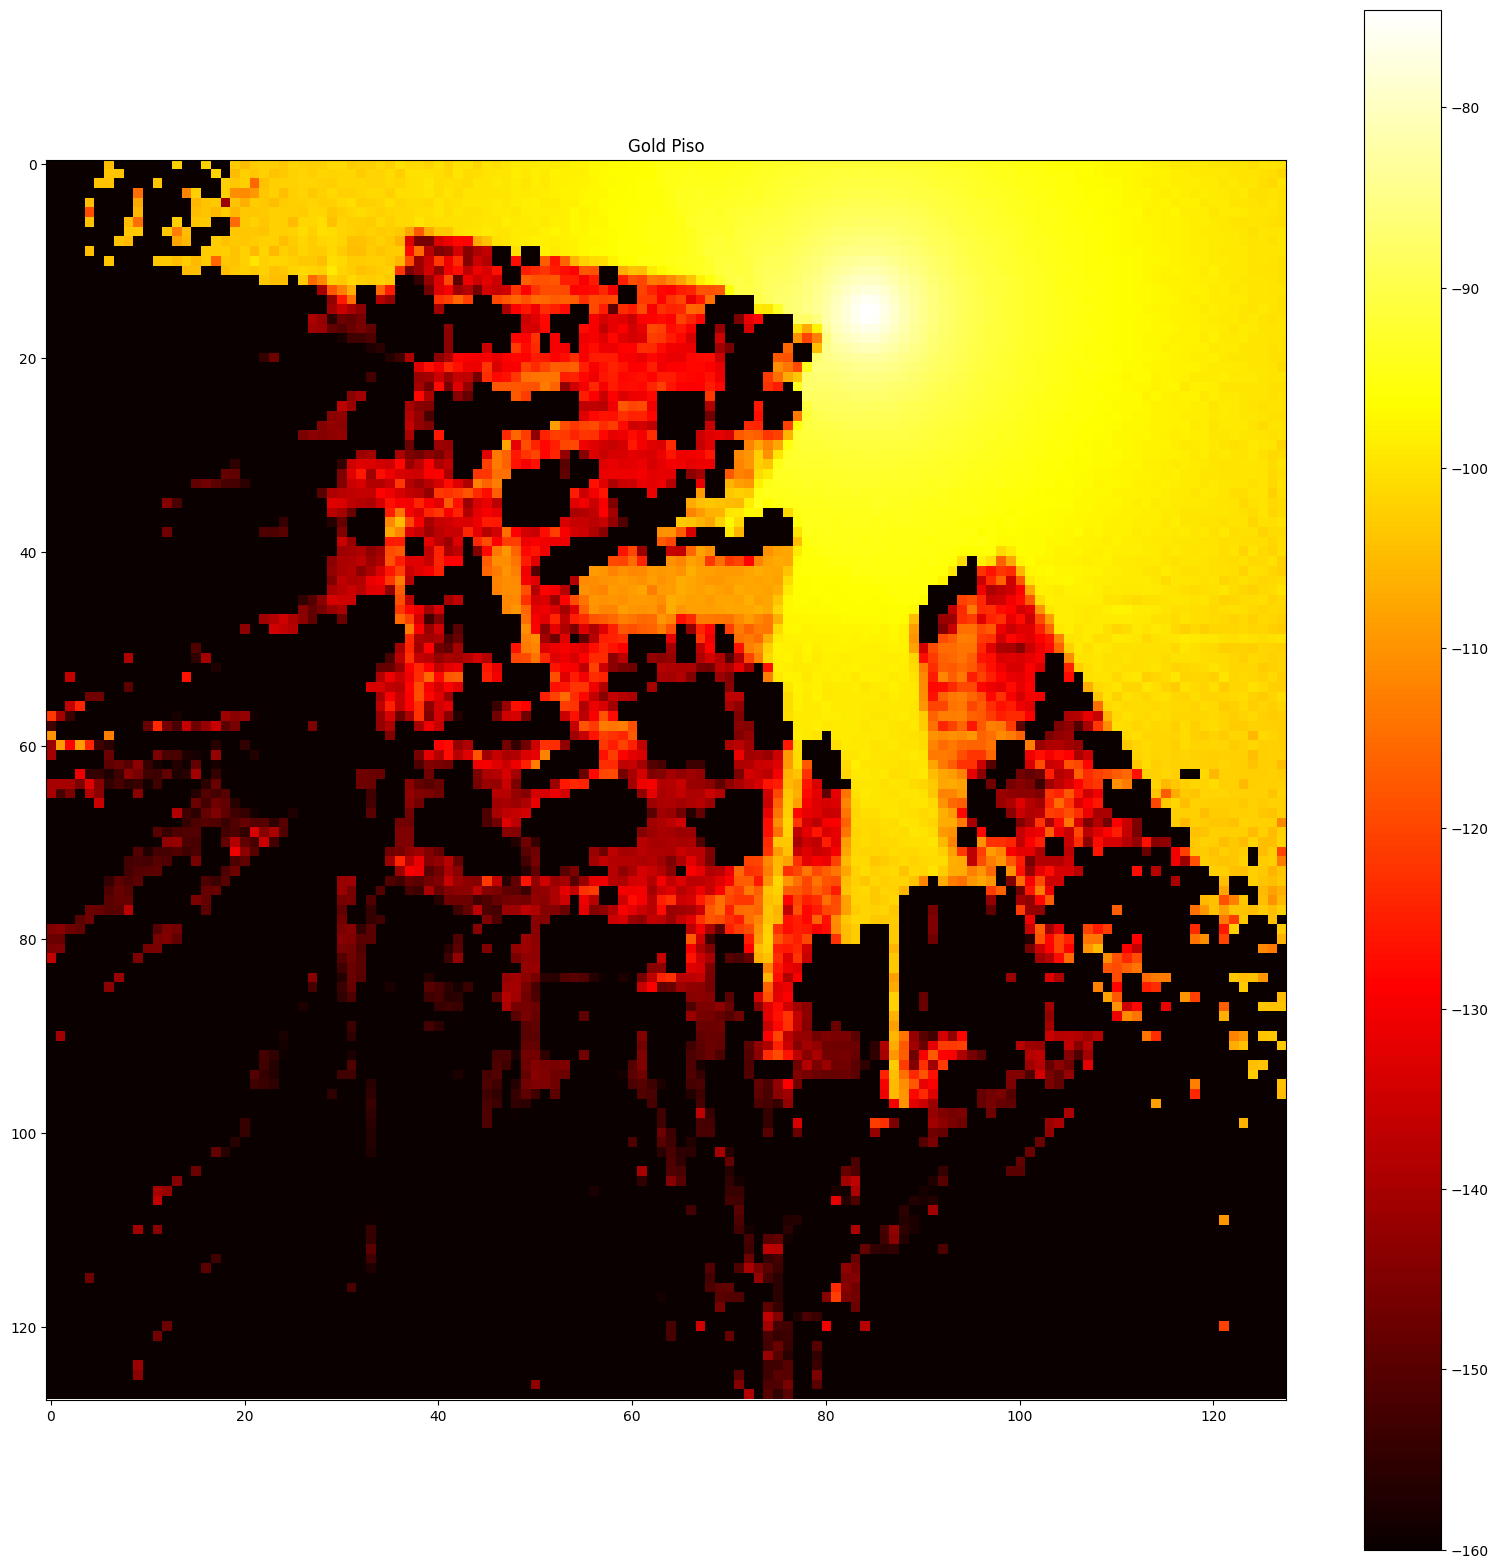

In [9]:
gold_image = np.load(r"D:\CK0731\PGM_v3_val\PGM1_6.npy").astype(np.float32)

plt.figure(figsize=(20,20))
plt.subplot()
plt.imshow(gold_image, cmap='hot')
plt.title('Gold Piso')
plt.colorbar()
print(gold_image)

[[ 1.0587341e+01  2.4632263e-01 -4.6795349e+00 ... -3.7114639e+00
  -2.1150665e+00 -3.4294815e+00]
 [ 1.6893005e-01  5.2094879e+00 -6.6664124e-01 ... -1.9616547e+00
  -2.9214859e+00 -1.4263916e+00]
 [-4.0229797e-01 -1.9424438e-02  4.1987762e+00 ... -1.4328842e+00
  -2.2569809e+00 -2.3003845e+00]
 ...
 [ 6.3339233e-02  2.4245453e+00 -2.5288849e+00 ...  7.7812195e-01
   1.6639404e+00 -6.8519592e-01]
 [ 2.9331970e-01  1.4422607e-01  2.2751465e+00 ...  1.1540375e+00
   8.9648438e-01  6.6978455e-01]
 [ 4.6676636e-02 -9.9395752e-02 -2.7938843e-02 ... -2.2740173e-01
   3.5858154e-03  2.2331238e-01]]


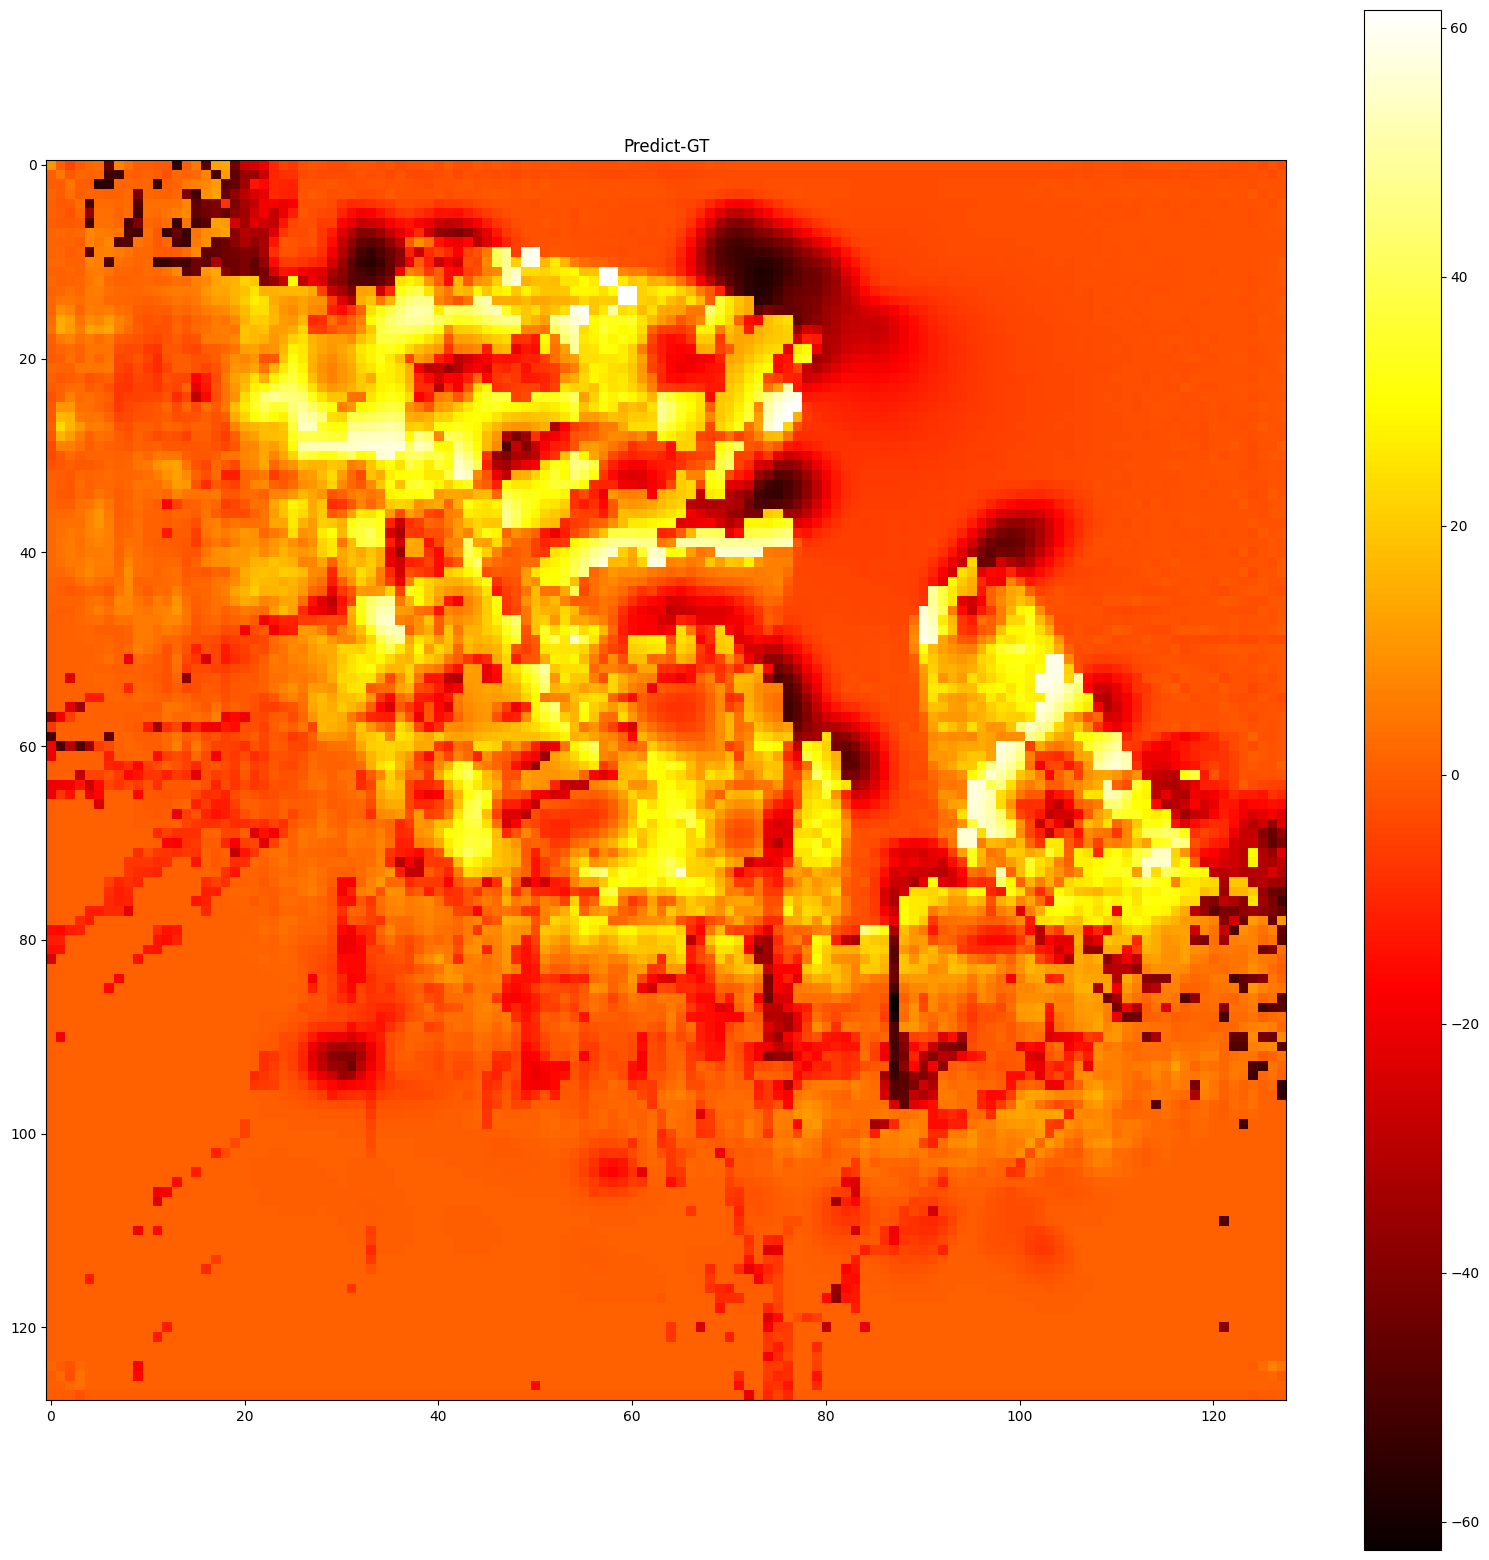

In [10]:
diff = output_image - gold_image
plt.figure(figsize=(20,20))
plt.subplot()
plt.imshow(diff, cmap='hot')
plt.title('Predict-GT')
plt.colorbar()
print(diff)

[[1.0587341e+01 2.4632263e-01 4.6795349e+00 ... 3.7114639e+00
  2.1150665e+00 3.4294815e+00]
 [1.6893005e-01 5.2094879e+00 6.6664124e-01 ... 1.9616547e+00
  2.9214859e+00 1.4263916e+00]
 [4.0229797e-01 1.9424438e-02 4.1987762e+00 ... 1.4328842e+00
  2.2569809e+00 2.3003845e+00]
 ...
 [6.3339233e-02 2.4245453e+00 2.5288849e+00 ... 7.7812195e-01
  1.6639404e+00 6.8519592e-01]
 [2.9331970e-01 1.4422607e-01 2.2751465e+00 ... 1.1540375e+00
  8.9648438e-01 6.6978455e-01]
 [4.6676636e-02 9.9395752e-02 2.7938843e-02 ... 2.2740173e-01
  3.5858154e-03 2.2331238e-01]]


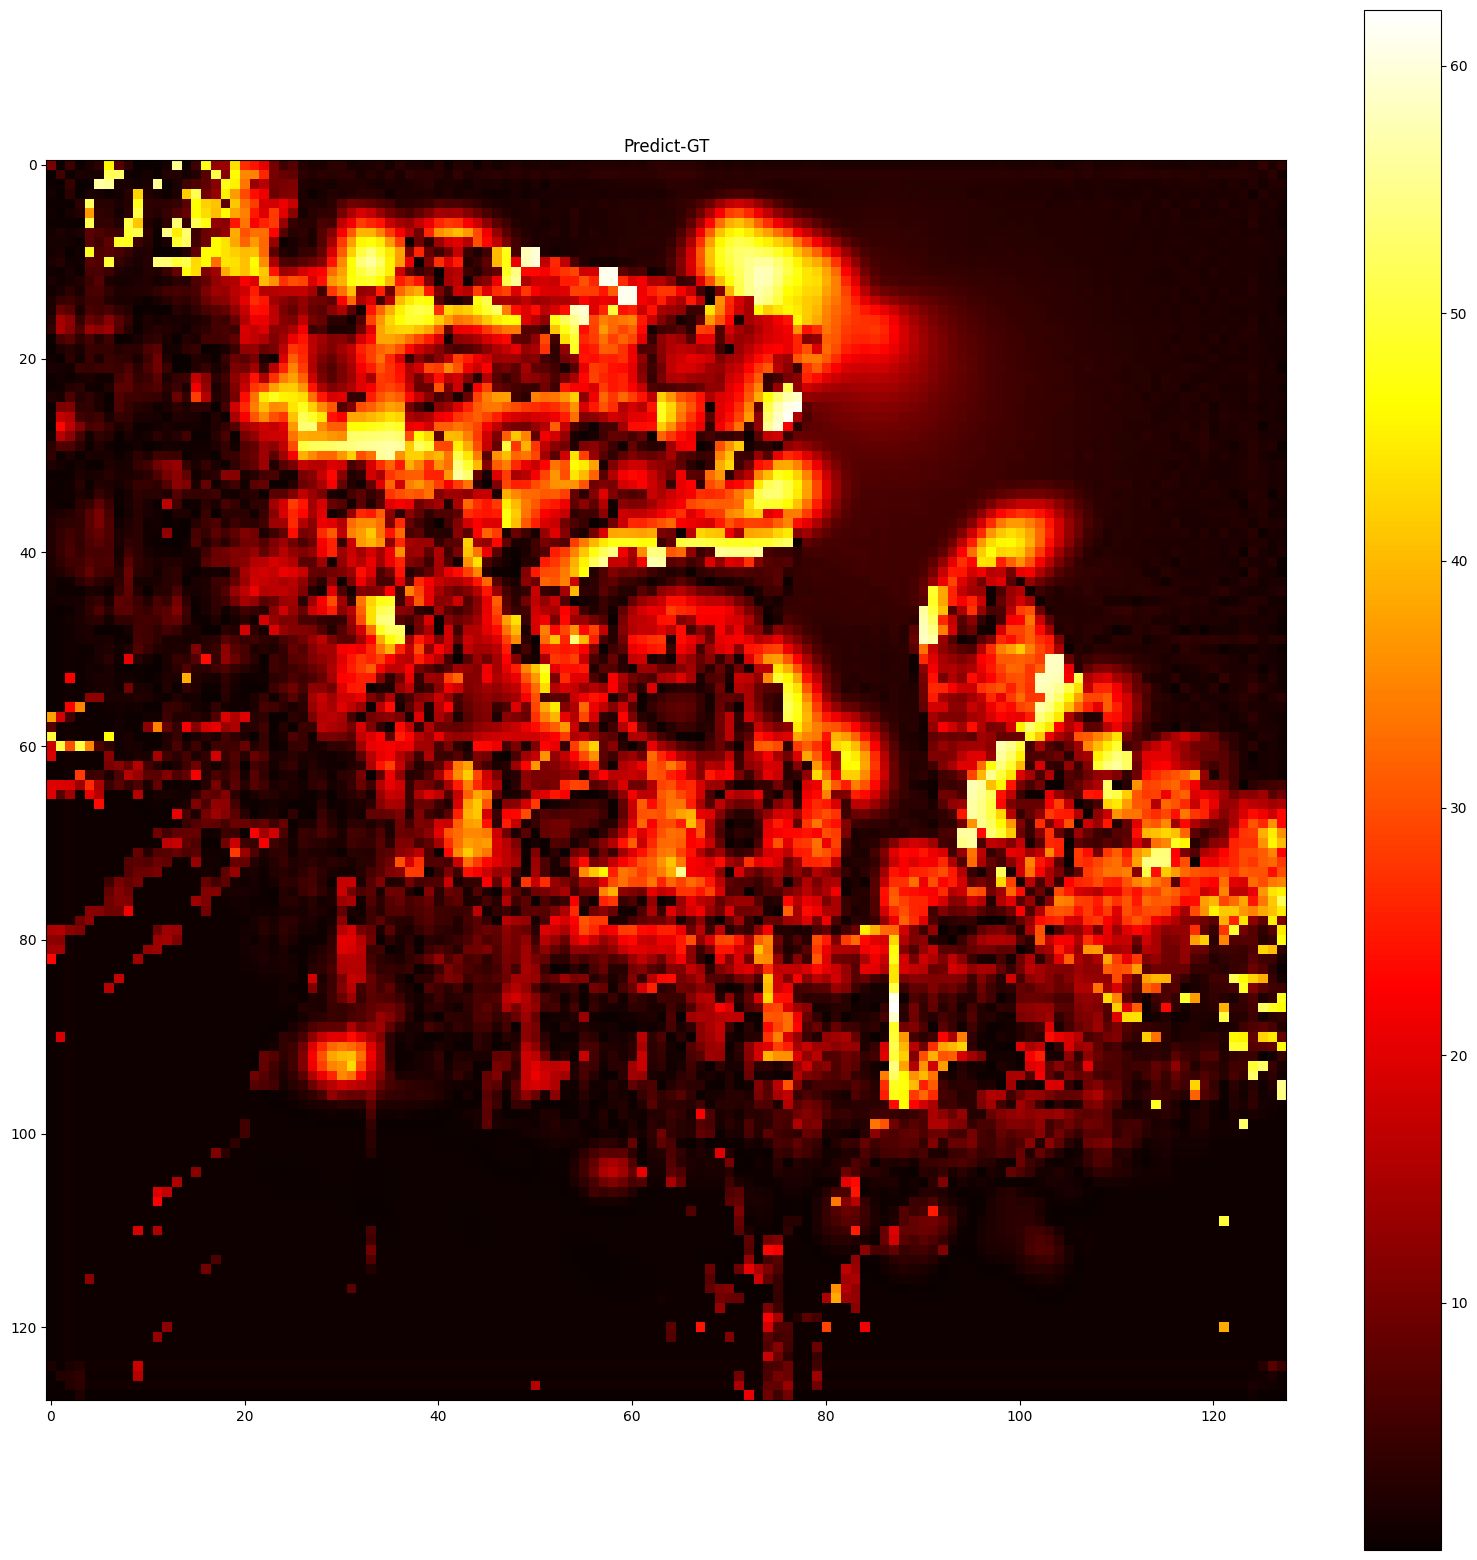

In [11]:
diff = abs(output_image - gold_image)
plt.figure(figsize=(20,20))
plt.subplot()
plt.imshow(diff, cmap='hot')
plt.title('Predict-GT')
plt.colorbar()
print(diff)